# <p style="background-color:#72cfcb; font-family:newtimeroman; color:#472e41; font-size:170%; text-align:center; border-radius:10px 10px;">Logistic Regression Project: Heart Disease Dataset</p>


<div class="alert alert-block alert-success">
    
## <span style=" color:red">Introduction

### Goal of the Project
I aim to create **a classification model to predict whether or not a person has presence of heart disease** based on physical features of that person (age,sex, cholesterol, etc...).

### About the Dataset

This dataset contains **14 physical attributes based on physical testing of a patient**. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient: **0 for no presence, 1 for presence**. In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

**Content**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

See: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
</span>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

# there are two categories in target variable

array([1, 0], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


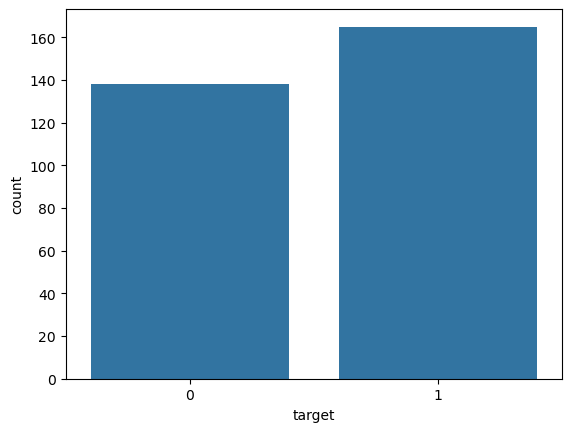

In [8]:
# Look at the target classes to check whether it is imbalanced
sns.countplot(df, x="target");

**Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
    
(The whole df would be too long to show in pairplot; instead, we can choose some relevant columns)

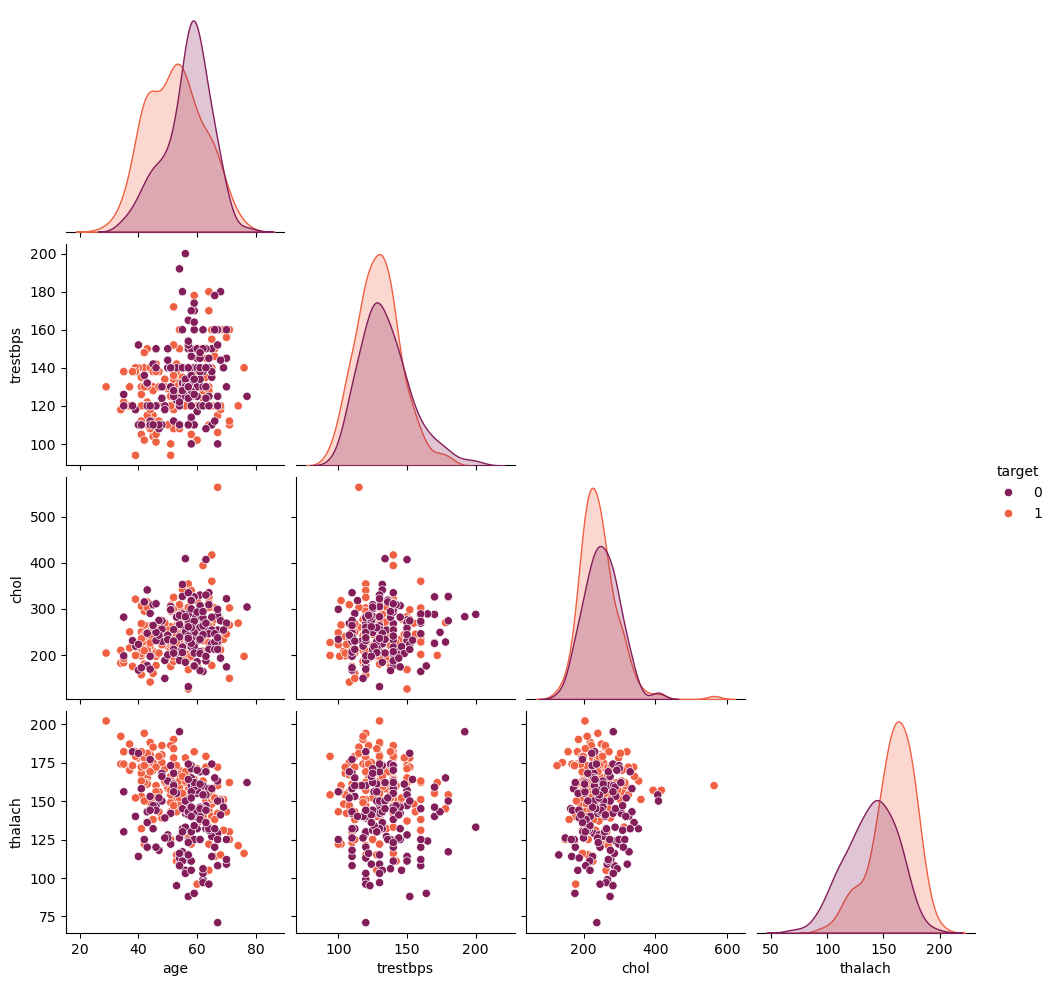

In [9]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue="target", corner=True, palette="rocket");

# corner=True gives us a half figure 

**Create a heatmap that displays the correlation between all the columns.**

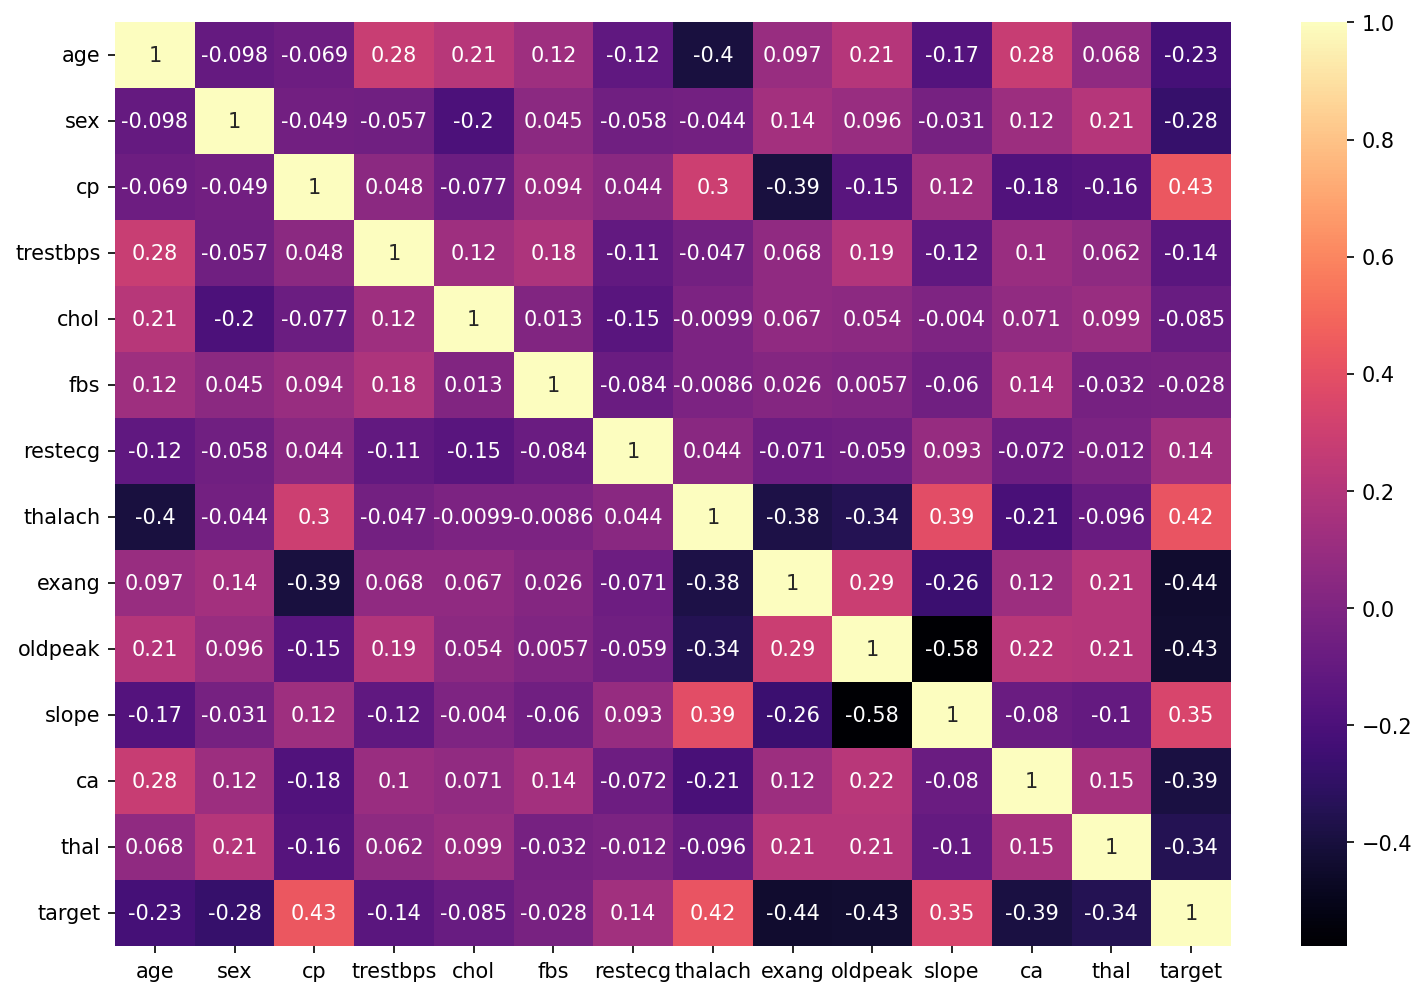

In [10]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(df.corr(), cmap='magma', annot=True);

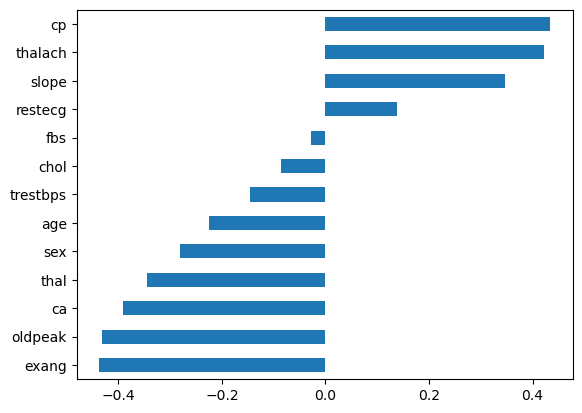

In [11]:
# Let's drop target column and look at its correlation with other features

df.corr()["target"].drop("target").sort_values().plot.barh()
plt.show()

----
# Machine Learning

## Train | Test Split and Scaling

**Separate the features from the labels into 2 objects, X and y.**

In [12]:
X = df.drop("target", axis=1)
y = df["target"]

**Perform a train test split with the test size of 10% and a random_state of 101.**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Create a StandardScaler object and normalize the X train and test set feature data. (Only fit to the training data to avoid data leakage).**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and Transform X_train
scaled_X_train = scaler.fit_transform(X_train)

# Only Transform X_test
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search.** 

There are two options here: *LogisticRegressionCV* or a combination of *LogisticRegression* and *GridSearchCV*. Since it is not a big dataset and the Grid model would not make big a difference, I will use LogisticRegressionCV model.

In [15]:
from sklearn.linear_model import LogisticRegressionCV

In [16]:
# help(LogisticRegressionCV)

# penalty: {"l1","l2","elastic"}, default="l2"
# Cs: int or list of floats, default=10  (smaller values specify stronger regularization)

In [17]:
# A logistic regression CV model with default values
log_model = LogisticRegressionCV()

In [18]:
# fit only training set (X scaled and y)
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [19]:
# See all Cs
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [20]:
# The actual C value decided on as best fit
log_model.C_

array([0.04641589])

In [21]:
log_model.get_params()

# These are the default values

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

**Create a visualization of the coefficients by using a barplot of their values.**

In [22]:
log_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

In [23]:
# To create a barplot...
coefs = pd.Series(index=X.columns, data=log_model.coef_[0])

# index gives the name of the columns
# [0] after "coef_" was used to get rid of double [[]]

In [24]:
coefs

age        -0.096242
sex        -0.394557
cp          0.535413
trestbps   -0.138450
chol       -0.088213
fbs         0.024956
restecg     0.080830
thalach     0.298969
exang      -0.334400
oldpeak    -0.352528
slope       0.251001
ca         -0.497326
thal       -0.374410
dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_508\2125851895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.index, y=coefs.values, palette="magma");


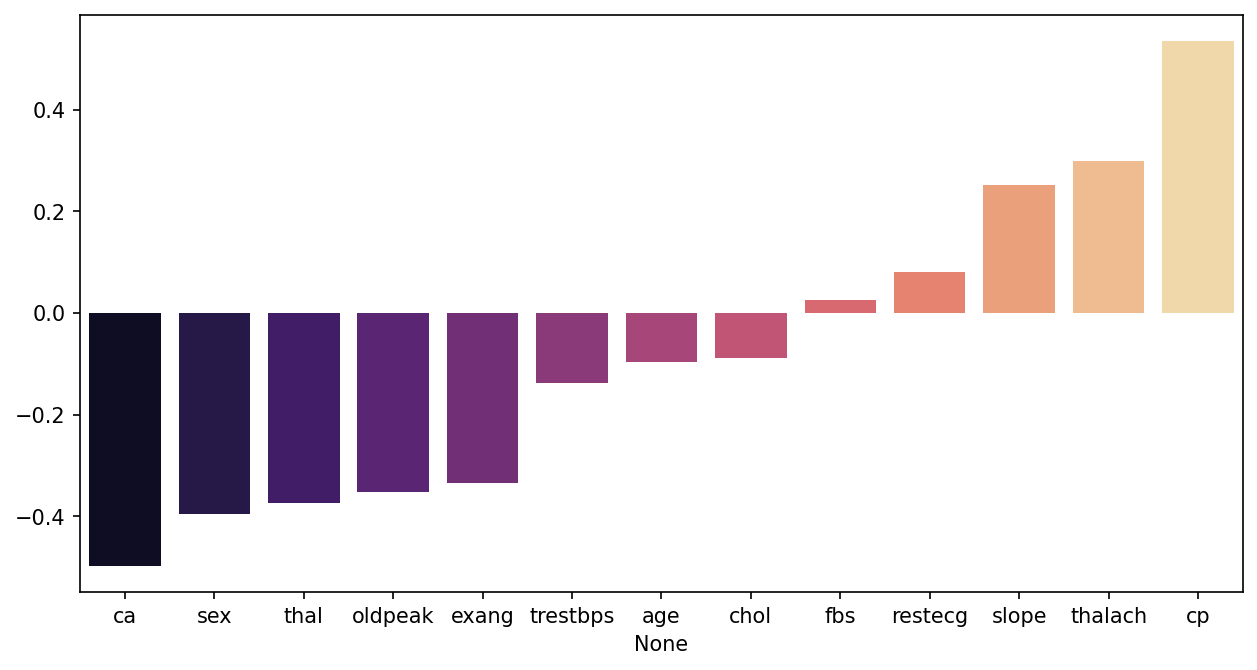

In [25]:
coefs = coefs.sort_values() # to display it sorted
plt.figure(figsize=(10,5), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values, palette="magma");

### Model Performance on Classification Task
**Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
y_pred = log_model.predict(scaled_X_test)

In [28]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

# compare the remaining 10% test set with the prediction

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay  

# "from sklearn.metrics import plot_confusion_matrix" is not in use

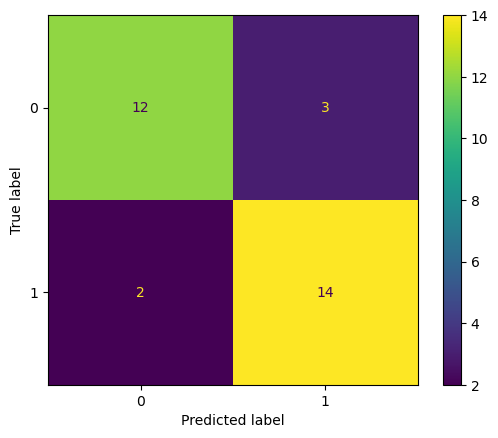

In [30]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

There are 5 wrong predictions.

In [31]:
# accuracy_score(y_true, y_pred)
accuracy_score(y_test, y_pred)

0.8387096774193549

In [32]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves: ROC and AUC

In [33]:
from sklearn.metrics import PrecisionRecallDisplay

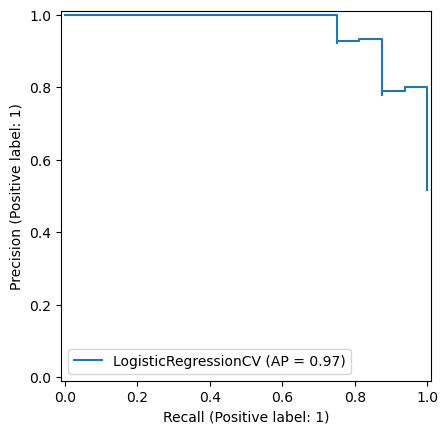

In [34]:
# Precision-Recall curve from estimator (model, X (scaled), y)

PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test)

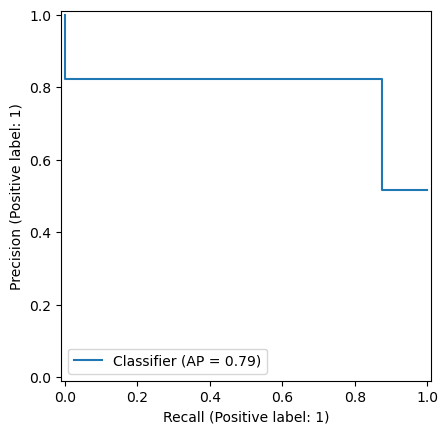

In [35]:
# Precision-Recall Curve from predicitons (y_true, y_pred)

PrecisionRecallDisplay.from_predictions(y_test, y_pred)

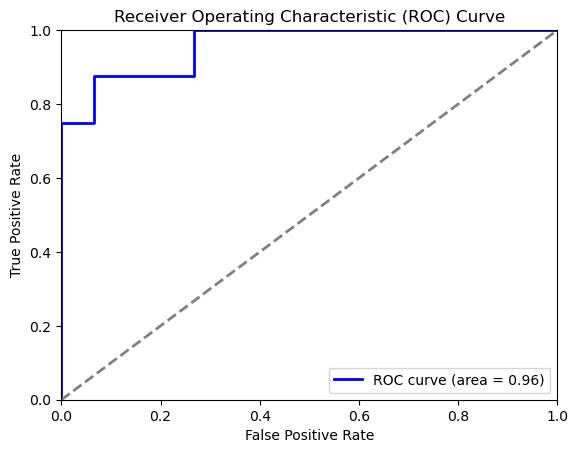

In [36]:
# ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_probs = log_model.predict_proba(scaled_X_test)[:, 1]

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Prediction of a new case

**What does the model predict for this patient? Do they have heart disease? How "sure" is the model of this prediction?**

In [37]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [38]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [39]:
y_test.iloc[-1]

0

In [40]:
log_model.predict(patient)

array([0], dtype=int64)

The model predicts it as "0" class. Let's look at its probabilities

In [41]:
log_model.predict_proba(patient)


array([[9.99999860e-01, 1.39946031e-07]])

It shows 99 percent and the model is quite sure that it is "0" class. So, the patient does not have a heart disease.